In [2]:
import pandas as pd 

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix\

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [3]:
X_train = pd.read_csv('bi_3_10000_X.csv', delimiter = ',')
Y_train = pd.read_csv('bi_3_10000_Y.csv', delimiter = ',')

In [4]:
X_train.shape, Y_train.shape

((10000, 49), (10000, 2))

In [5]:
X_train = X_train.iloc[:,1:]
Y_train = Y_train.iloc[:,1]
Y_train = pd.factorize(Y_train)[0]

In [37]:
X_train = StandardScaler().fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [631]:
X_train.shape, Y_train.shape

((10000, 48), (10000,))

In [528]:
def elbow(X):
    sse = []
    for i in range(1, 20):
        km = KMeans(n_clusters=i, random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,20), sse, marker='o')
    plt.xlabel('num of clusters')
    plt.ylabel('SSE')
    plt.show()
    

In [6]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0,0
    yticks=[]
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor='none' , color = color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color= 'red', linestyle =  '--')
    print(silhoutte_avg)
    plt.yticks(yticks,cluster_labels+1)
    plt.ylabel('cluster')
    plt.xlabel('silhouette')
    plt.show()



0.9097128389874702


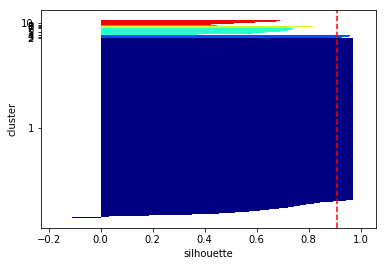

In [9]:
km= KMeans(n_clusters=10, random_state=0)
y_km = km.fit_predict(X_train)
plotSilhouette(X_train,y_km)

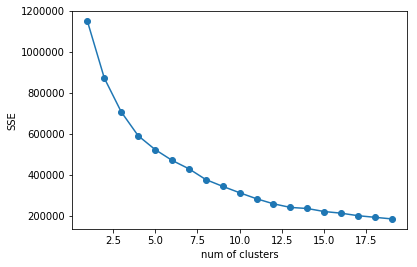

In [522]:
#model1
elbow(X_train)

0.4633134023609257


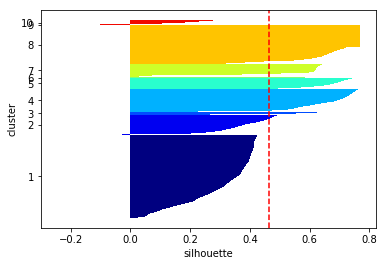

In [565]:
#model 1
km= KMeans(n_clusters=10, random_state=0)
y_km = km.fit_predict(X_train)
plotSilhouette(X_train,y_km)

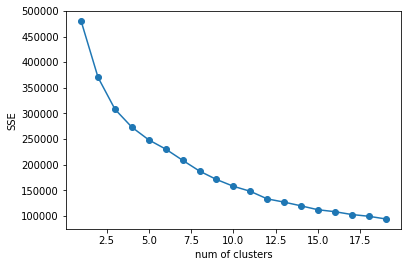

In [529]:
#model2
elbow(X_train)

0.5179882347576545


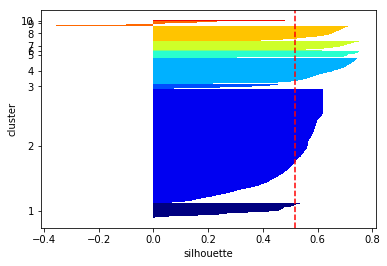

In [571]:
#model 2
km= KMeans(n_clusters=10, random_state=0)
y_km = km.fit_predict(X_train)
plotSilhouette(X_train,y_km)

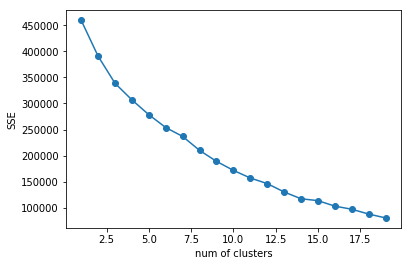

In [535]:
#model3
elbow(X_train)

0.5256318929266839


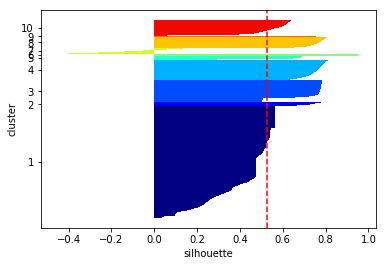

In [557]:
#model 3
km= KMeans(n_clusters=10, random_state=0)
y_km = km.fit_predict(X_train)
plotSilhouette(X_train,y_km)

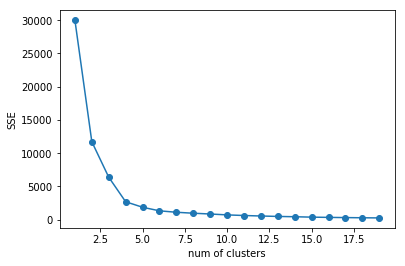

In [550]:
#model 4
X_temp = X_train[:,0:3]
Y_temp = Y_train
elbow(X_temp)

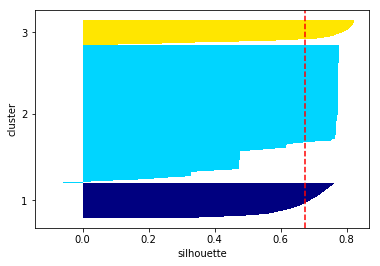

In [553]:
#model 4
km= KMeans(n_clusters=3, random_state=0)
y_km = km.fit_predict(X_temp)
plotSilhouette(X_temp,y_km)

0.6815547095248706


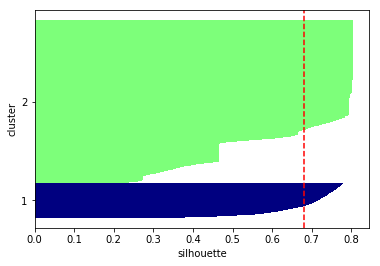

In [580]:
#model 4
km= KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X_temp)
plotSilhouette(X_temp,y_km)

In [556]:
#model 4
print('Accuracy: %.2f' % accuracy_score(Y_temp, y_km))
print(confusion_matrix(Y_temp, y_km))

Accuracy: 0.68
[[1768 3232]
 [   0 5000]]


In [577]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_train) 

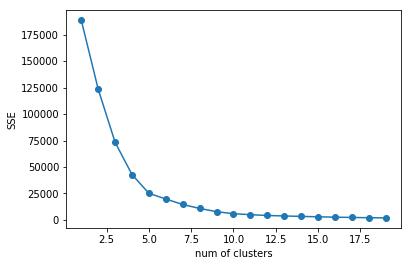

In [578]:
elbow(X_reduced)

0.6600243221262563


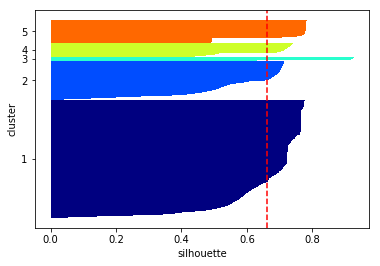

In [579]:
km= KMeans(n_clusters=5, random_state=0)
y_km = km.fit_predict(X_reduced)
plotSilhouette(X_reduced,y_km)

# Multi

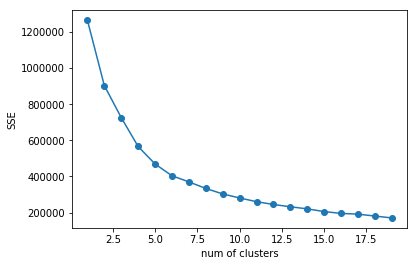

In [601]:
#model 1
elbow(X_train)

0.597652808113857


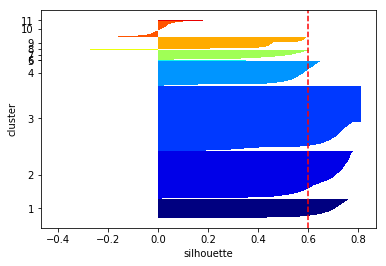

In [602]:
#model 1
km= KMeans(n_clusters=11, random_state=0)
y_km = km.fit_predict(X_train)
plotSilhouette(X_train,y_km)

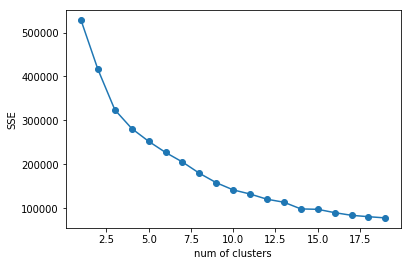

In [595]:
#model 2
elbow(X_train)

0.6038134099257153


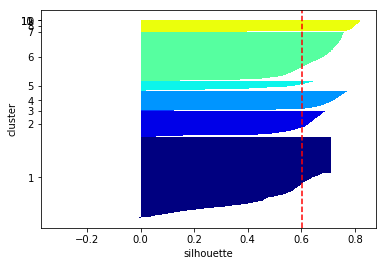

In [596]:
#model 2
km= KMeans(n_clusters=11, random_state=0)
y_km = km.fit_predict(X_train)
plotSilhouette(X_train,y_km)

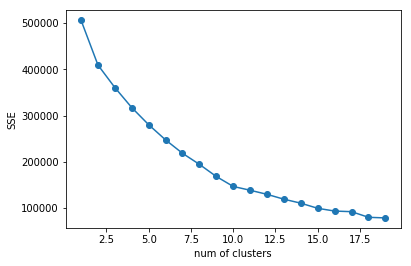

In [585]:
#model 3
elbow(X_train)

0.6083873976796367


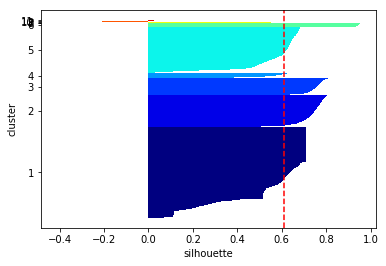

In [586]:
#model 3
km= KMeans(n_clusters=11, random_state=0)
y_km = km.fit_predict(X_train)
plotSilhouette(X_train,y_km)

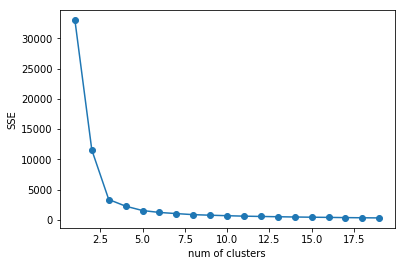

In [587]:
#model 4
X_temp = X_train[:,0:3]
Y_temp = Y_train
elbow(X_temp)

0.6546626197102551


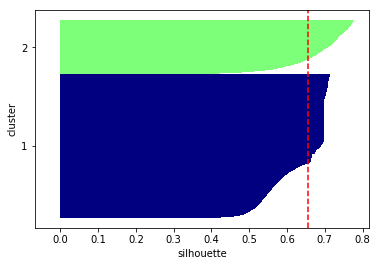

In [588]:
#model 4
km= KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X_temp)
plotSilhouette(X_temp,y_km)

0.742717579050908


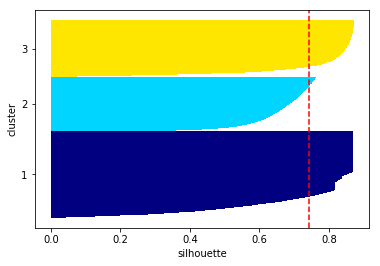

In [589]:
#model 4
km= KMeans(n_clusters=3, random_state=0)
y_km = km.fit_predict(X_temp)
plotSilhouette(X_temp,y_km)

# DBSCAN

차원의 저주가 나타난다.

In [7]:
from sklearn.cluster import DBSCAN

In [38]:
X_temp = X_train[:,0:3]
Y_temp = Y_train

In [632]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_train)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [ 0  0  0 ... 21 21 21]


-0.9177038753180116


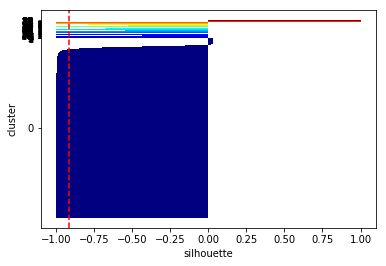

In [609]:
#bi_1 No scale
plotSilhouette(X_train, clusters)

In [610]:
#bi_1 No scale
max(clusters)

85

-0.04113061052341861


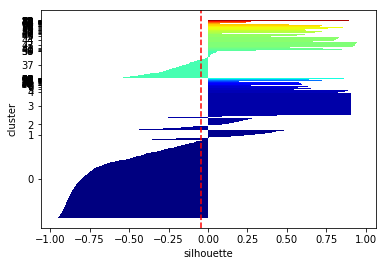

In [614]:
#bi_1  scale O
plotSilhouette(X_train, clusters)

In [615]:
#bi_1  scale O
print(max(clusters))

83


16
-0.8601740059509312


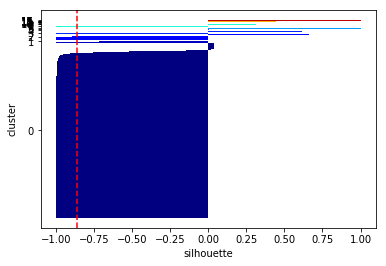

In [620]:
#bi_2  scale X
print(max(clusters))
plotSilhouette(X_train, clusters)

48
0.14507830021467574


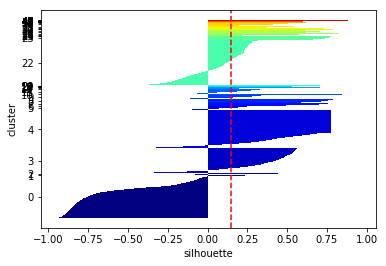

In [624]:
#bi_2  scale O
print(max(clusters))
plotSilhouette(X_train, clusters)

21
-0.8159410679465544


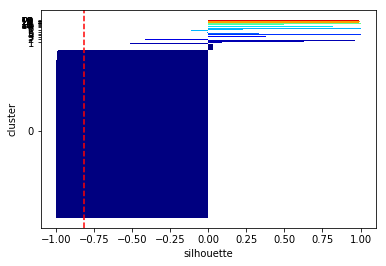

In [629]:
#bi_3 scale X
print(max(clusters))
plotSilhouette(X_train, clusters)

54
0.39198527680749756


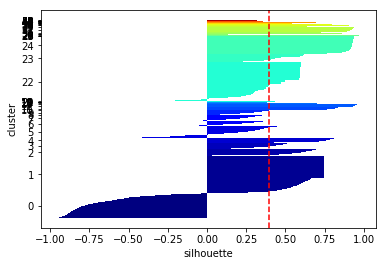

In [633]:
#bi_3  scale O
print(max(clusters))
plotSilhouette(X_train, clusters)

4
0.4237308747684823


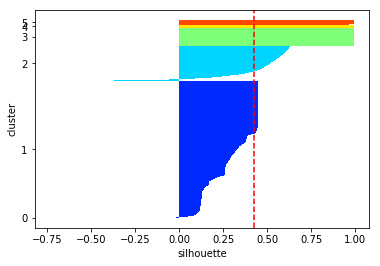

In [636]:
#bi_4  scale O
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_temp)
print(max(clusters))
plotSilhouette(X_temp, clusters)

1
0.6814808478306233


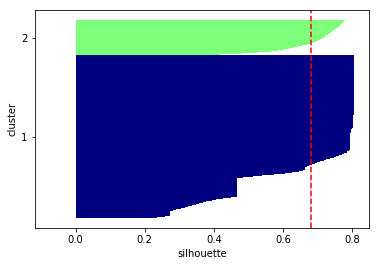

In [59]:
#final scaleO, para optimize
dbscan = DBSCAN(eps=1,min_samples=2)
clusters = dbscan.fit_predict(X_temp)
print(max(clusters))
plotSilhouette(X_temp, clusters)

In [64]:
sum =0
for i in clusters:
    if(i==0):
        sum+=1

In [65]:
sum

8231

In [61]:
print('Accuracy: %.2f' % accuracy_score(Y_temp, clusters))
print(confusion_matrix(Y_temp, clusters))

Accuracy: 0.32
[[3231 1769]
 [5000    0]]


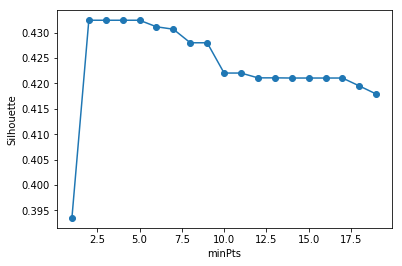

In [41]:
epsD(X_temp)

In [ ]:
[0.001,0.01,0.1, 0.3, 0.5, 0.7 ,1, 1.3 ,1.5]

In [56]:
lists = [0.32192831660084703, 0.24768577120263982, 0.2854253516544429, 0.43242484135528314, 0.4237308747684823, 0.647169334912813, 0.6814808478306233, 0.6814808478306233, 0.6814808478306233]

In [57]:
len(lists)

9

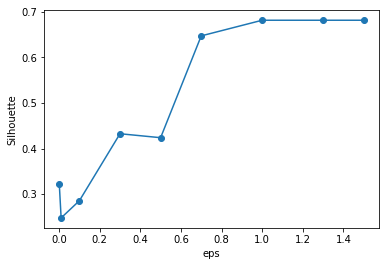

In [58]:
plt.plot([0.001,0.01,0.1, 0.3, 0.5, 0.7 ,1,1.3, 1.5], lists, marker='o')
plt.xlabel('eps')
plt.ylabel('Silhouette')
plt.show()

# multi

In [ ]:
X_temp = X_train[:,0:3]
Y_temp = Y_train

In [641]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_train)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 10 -1 ... -1 -1 -1]


84
-0.016705616118797843


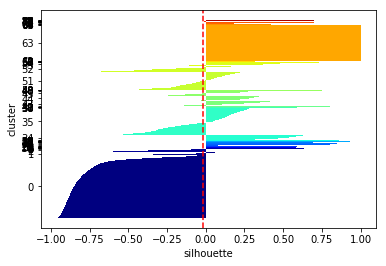

In [642]:
#mul_1  scale O
print(max(clusters))
plotSilhouette(X_train, clusters)

84
-0.19951599206464607


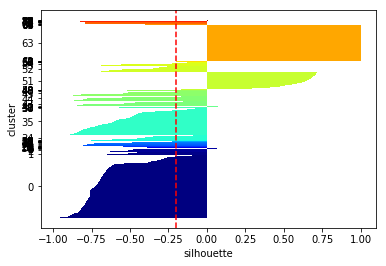

In [647]:
#mul_3  scale O
print(max(clusters))
plotSilhouette(X_train, clusters)

4
0.4237308747684823


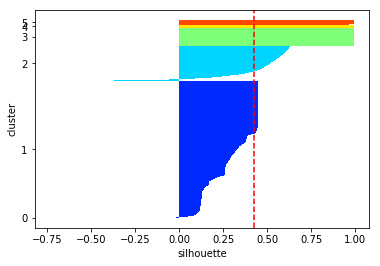

In [648]:
# mul_4 차원 축소
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_temp)
print(max(clusters))
plotSilhouette(X_temp, clusters)

In [13]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_temp)
printSilhouette(X_temp, clusters)

0.6546025122453529

In [11]:
def printSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    silhoutte_avg = np.mean(silhouette_vals)
    return silhoutte_avg



In [25]:
lists = [0.11511484719441871, 0.2004112243994541, 0.2690330694239662,0.5769822608426733,0.6546025122453529, 0.6546025122453529, 0.6546025122453529, 0.6546025122453529]

In [26]:
len(lists)

8

In [24]:
val = [0.001,0.01,0.1,1,10,100,1000]
dbscan = DBSCAN(eps= 0.3 ,min_samples=5)
clusters = dbscan.fit_predict(X_temp)
sil.append(printSilhouette(X_temp, clusters))
print(sil)

[0.11511484719441871, 0.2004112243994541, 0.2690330694239662, 0.6546025122453529, 0.6546025122453529, 0.6546025122453529, 0.6546025122453529, 0.5769822608426733]


In [19]:
print(sil)
[,1 , 1.5 ]

[0.11511484719441871, 0.2004112243994541, 0.2690330694239662, 0.6546025122453529, 0.6546025122453529]


In [26]:
val = [0.001,0.01,0.1,1,10,100,1000]
def minPtsD(X):
    sil = []
    for i in val:
        dbscan = DBSCAN(eps= val,min_samples=5)
        clusters = dbscan.fit_predict(X)
        sil.append(printSilhouette(X, clusters))
        
    plt.plot(range(1,7), sil, marker='o')
    plt.xlabel('eps')
    plt.ylabel('Silhouette')
    plt.show()
    


0.001
0.01
0.1
1
10
100
1000


In [40]:
def epsD(X):
    sil = []
    for i in range(1, 20):
        dbscan = DBSCAN(eps=0.3,min_samples=i)
        clusters = dbscan.fit_predict(X)
        sil.append(printSilhouette(X, clusters))
        
    plt.plot(range(1,20), sil, marker='o')
    plt.xlabel('minPts')
    plt.ylabel('Silhouette')
    plt.show()
    

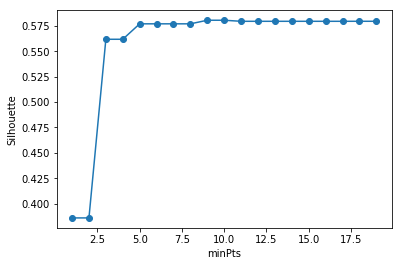

In [17]:
epsD(X_temp)

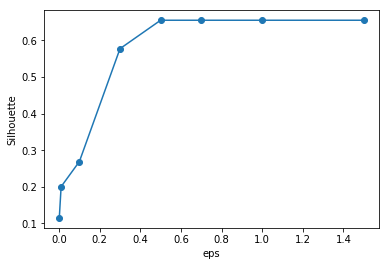

In [30]:
plt.plot([0.001,0.01,0.1, 0.3, 0.5, 0.7 ,1, 1.5], lists, marker='o')
plt.xlabel('eps')
plt.ylabel('Silhouette')
plt.show()

1
0.6546025122453529


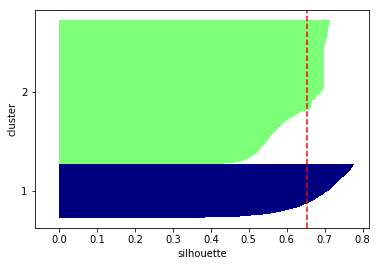

In [31]:
dbscan = DBSCAN(eps=0.5,min_samples=4)
clusters = dbscan.fit_predict(X_temp)
print(max(clusters))
plotSilhouette(X_temp, clusters)

In [ ]:
clusters

In [33]:
confusion_matrix(Y_train, clusters)

array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [92]:
import mglearn

# PCA

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()



Text(0, 0.5, 'main 1')

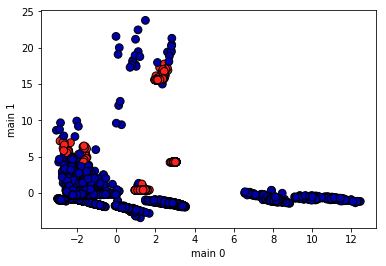

In [475]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("main 0")
plt.ylabel("main 1")

Text(0, 0.5, 'main 1')

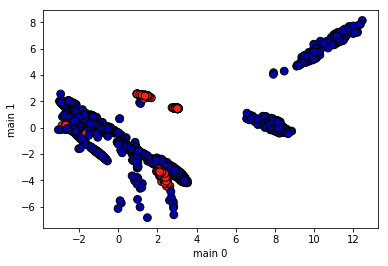

In [476]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 2], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("main 0")
plt.ylabel("main 1")

Text(0, 0.5, 'main 1')

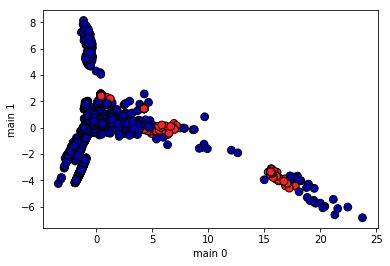

In [477]:
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("main 0")
plt.ylabel("main 1")

Text(0, 0.5, 'main 1')

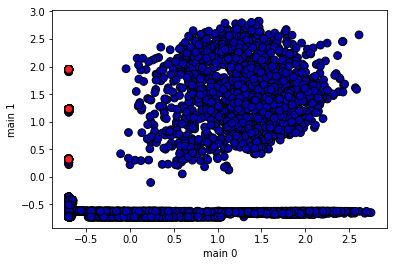

In [469]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("main 0")
plt.ylabel("main 1")

Text(0, 0.5, 'main 1')

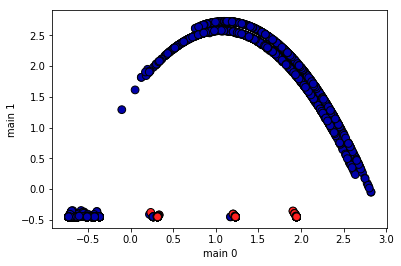

In [471]:
plt.scatter(X_train[:, 1], X_train[:, 2], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("main 0")
plt.ylabel("main 1")

Text(0, 0.5, 'main 1')

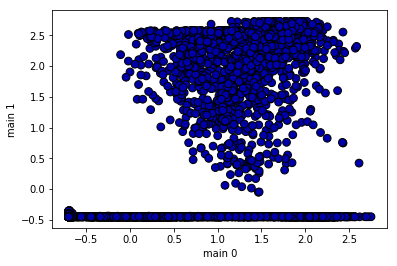

In [472]:
plt.scatter(X_train[:, 0], X_train[:, 2], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("main 0")
plt.ylabel("main 1")

# Real

Text(0, 0.5, 'main 1')

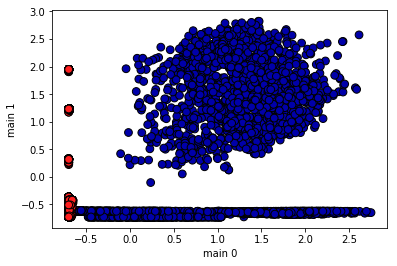

In [473]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("main 0")
plt.ylabel("main 1")

Text(0, 0.5, 'main 1')

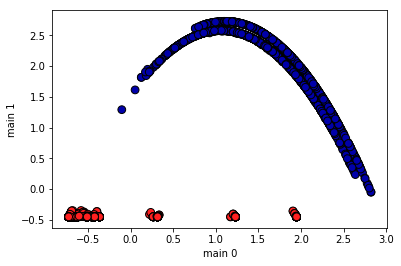

In [474]:
plt.scatter(X_train[:, 1], X_train[:, 2], c=Y_train, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("main 0")
plt.ylabel("main 1")